In [2]:
import pandas as pd
import numpy as np
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time

In [4]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2620,2626,2631,2637,2648,2659,2668,2683,2692,2693
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,246893,248482,251288,253922,256461,259133,262017,264395,265897,268132
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4620,4697,4798,4881,4975,5047,5133,5233,5276,5357
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,88730,88800,88930,89009,89071,89386,89592,89783,89918,90029


In [5]:
cols = confirmed_df.keys()

confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [6]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21
0,0,0,0,0,0,0,0,0,0,0,...,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160
1,0,0,0,0,0,0,0,0,0,0,...,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393
2,0,0,0,0,0,0,0,0,0,0,...,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516
3,0,0,0,0,0,0,0,0,0,0,...,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545
4,0,0,0,0,0,0,0,0,0,0,...,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,2,2,2,2,2,2,2,2,2,...,2620,2626,2631,2637,2648,2659,2668,2683,2692,2693
270,0,0,0,0,0,0,0,0,0,0,...,246893,248482,251288,253922,256461,259133,262017,264395,265897,268132
271,0,0,0,0,0,0,0,0,0,0,...,4620,4697,4798,4881,4975,5047,5133,5233,5276,5357
272,0,0,0,0,0,0,0,0,0,0,...,88730,88800,88930,89009,89071,89386,89592,89783,89918,90029


In [7]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
#     recovery_rate.append(recovered_sum/confirmed_sum)

In [8]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)



In [9]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [10]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

In [11]:
def country_plot(x, y1, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
#     recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

#     plt.figure(figsize=(16, 10))
#     plt.bar(x, y4)
#     plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
#     plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
#     plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
#     plt.xlabel('Days Since 1/22/2020', size=30)
#     plt.ylabel('# of Cases', size=30)
#     plt.xticks(size=20)
#     plt.yticks(size=20)
#     plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)

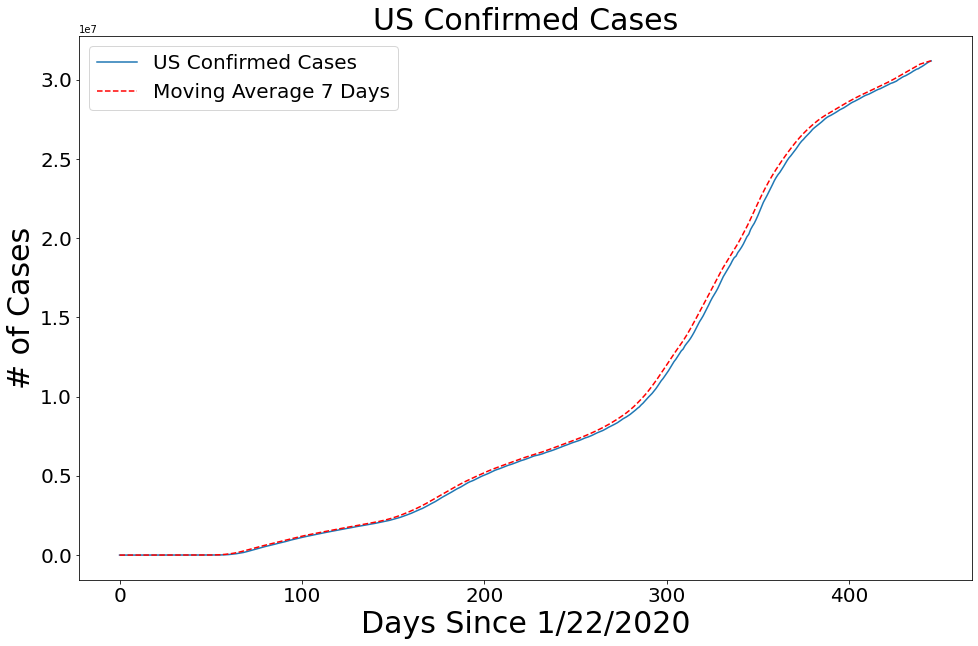

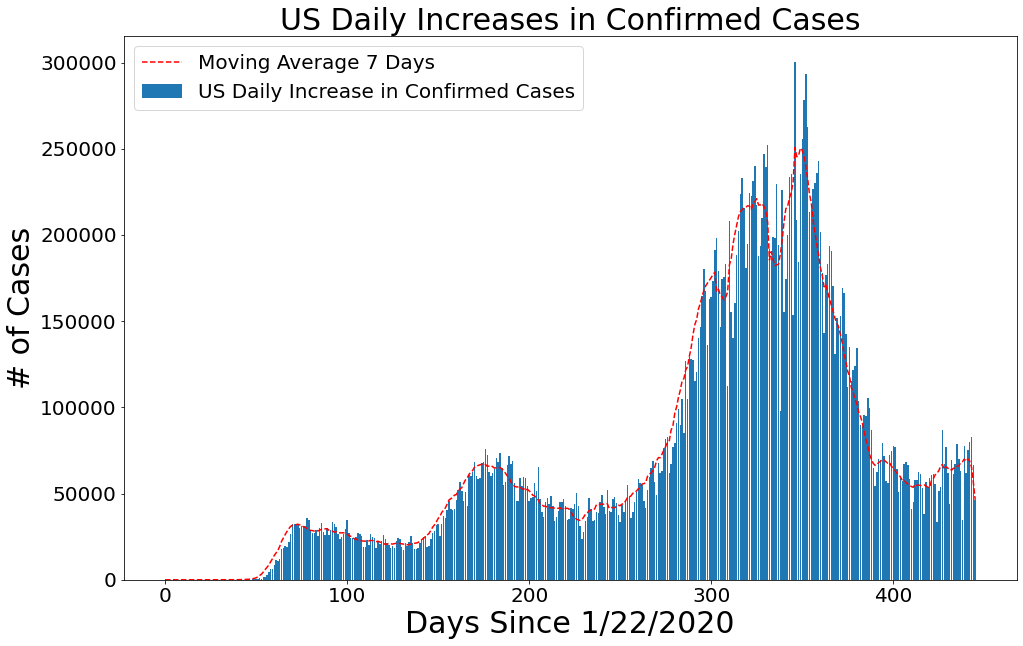

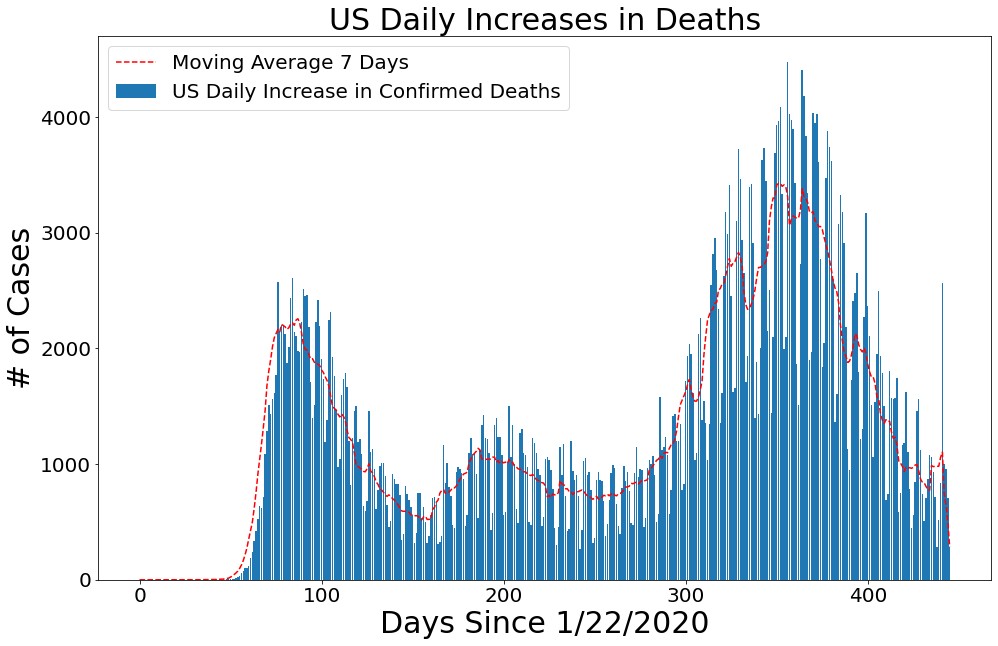

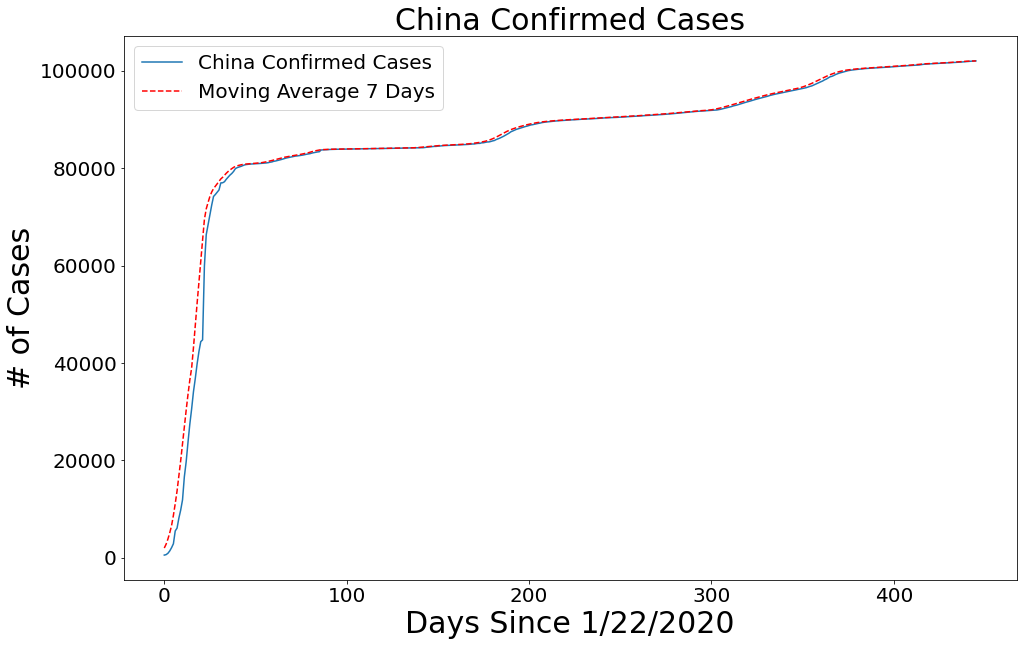

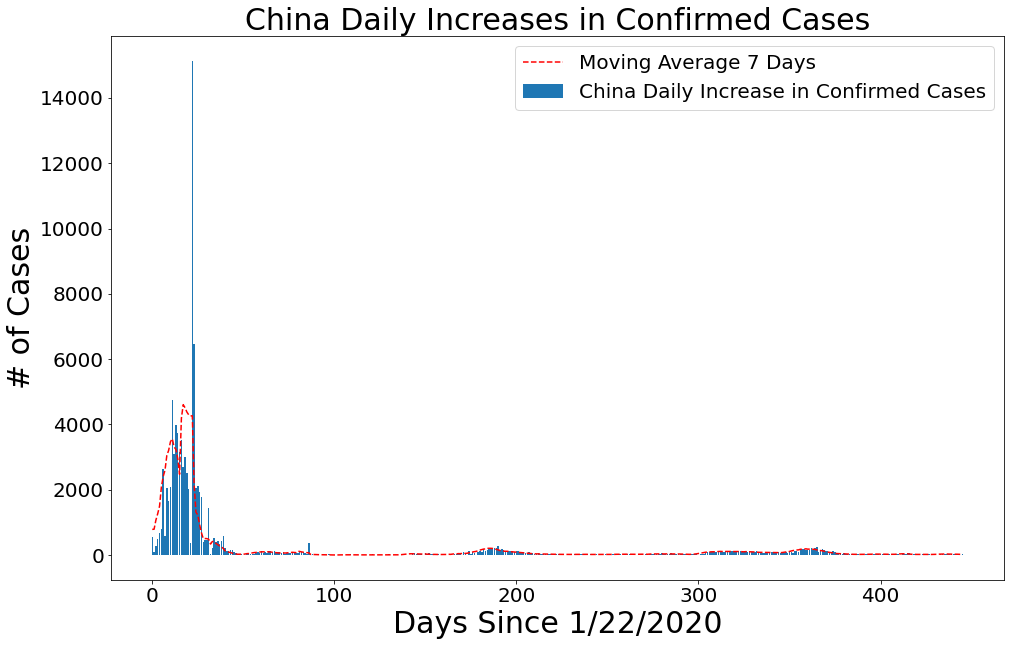

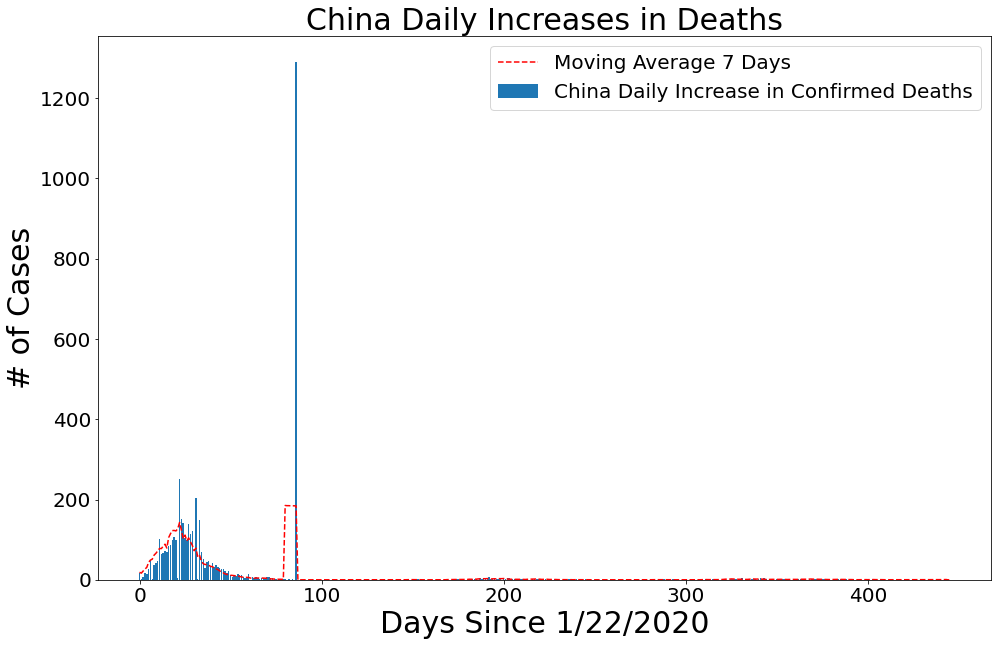

In [12]:
countries = ['US', 'China'] 

for country in countries:
    country_visualizations(country)

In [33]:
country_info = get_country_info('US')
pd.DataFrame(country_info[0]).to_csv('US_confirmed.csv')
pd.DataFrame(country_info[1]).to_csv('US_death.csv')
pd.DataFrame(daily_increase(country_info[0])).to_csv('US_daily.csv')



















In [50]:
pd.DataFrame({'confirmed': country_info[0], 'moving average': moving_average(country_info[0], 14)}).to_csv('US_confirmed.csv')
pd.DataFrame({'death': country_info[1], 'moving average': moving_average(country_info[1], 14)}).to_csv('US_death.csv')
pd.DataFrame({'daily': daily_increase(country_info[0]), 'moving average': moving_average(daily_increase(country_info[0]), 14)}).to_csv('US_daily.csv')

In [25]:
country_info = get_country_info('China')

In [26]:
pd.DataFrame(country_info[0]).to_csv('China_confirmed.csv')
pd.DataFrame(country_info[1]).to_csv('China_daily.csv')

In [27]:
country_info[1]

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 361,
 425,
 491,
 563,
 633,
 718,
 805,
 905,
 1012,
 1112,
 1117,
 1369,
 1521,
 1663,
 1766,
 1864,
 2003,
 2116,
 2238,
 2238,
 2443,
 2445,
 2595,
 2665,
 2717,
 2746,
 2790,
 2837,
 2872,
 2914,
 2947,
 2983,
 3015,
 3044,
 3072,
 3100,
 3123,
 3139,
 3161,
 3172,
 3180,
 3193,
 3203,
 3217,
 3230,
 3241,
 3249,
 3253,
 3259,
 3274,
 3274,
 3281,
 3285,
 3291,
 3296,
 3299,
 3304,
 3308,
 3309,
 3316,
 3322,
 3326,
 3330,
 3333,
 3335,
 3335,
 3337,
 3339,
 3340,
 3343,
 3343,
 3345,
 3345,
 3346,
 3346,
 4636,
 4636,
 4636,
 4636,
 4636,
 4636,
 4636,
 4636,
 4636,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 46

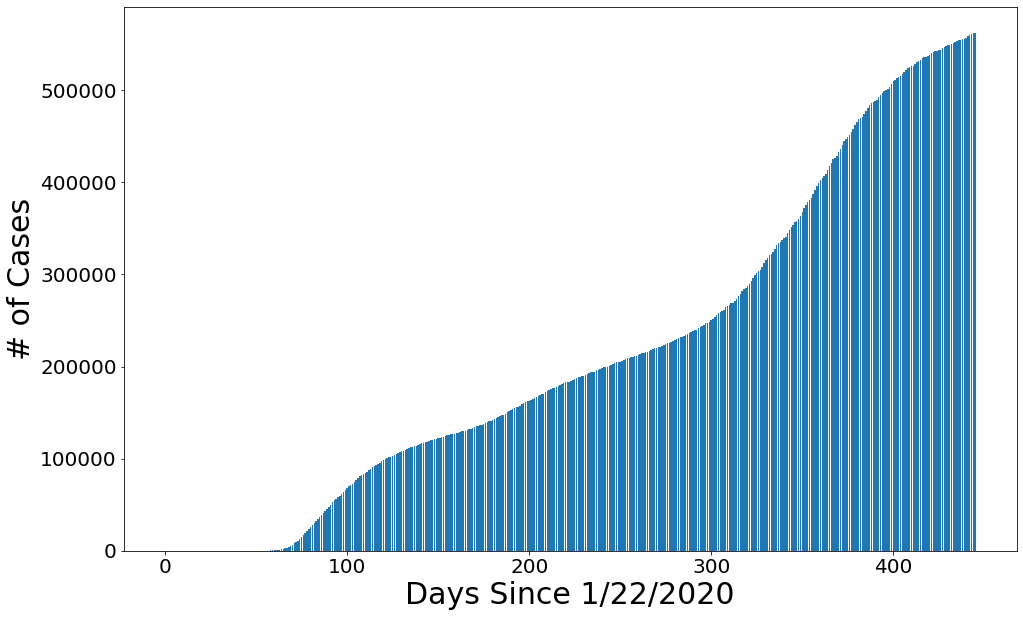

In [32]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, country_info[1])

plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [47]:
moving_average(country_info[0], 14)

[5.642857142857143,
 6.357142857142857,
 7.142857142857143,
 7.857142857142857,
 8.571428571428571,
 9.071428571428571,
 9.571428571428571,
 10.142857142857142,
 10.642857142857142,
 11.214285714285714,
 11.642857142857142,
 12.071428571428571,
 12.5,
 12.714285714285714,
 12.928571428571429,
 13.142857142857142,
 13.285714285714286,
 13.571428571428571,
 13.857142857142858,
 14.142857142857142,
 14.428571428571429,
 14.642857142857142,
 14.857142857142858,
 15.071428571428571,
 15.285714285714286,
 16.071428571428573,
 17.357142857142858,
 20.285714285714285,
 24.571428571428573,
 31.214285714285715,
 43.357142857142854,
 59.142857142857146,
 86.78571428571429,
 122.71428571428571,
 164.0,
 218.71428571428572,
 299.5,
 411.57142857142856,
 568.8571428571429,
 779.7857142857143,
 1006.9285714285714,
 1337.2142857142858,
 1797.0714285714287,
 2444.3571428571427,
 3407.1428571428573,
 4820.928571428572,
 6651.071428571428,
 9106.714285714286,
 12359.714285714286,
 16357.785714285714,
 21

In [51]:
country_info = get_country_info('China')

In [52]:
pd.DataFrame({'confirmed': country_info[0], 'moving average': moving_average(country_info[0], 14)}).to_csv('China_confirmed.csv')
pd.DataFrame({'death': country_info[1], 'moving average': moving_average(country_info[1], 14)}).to_csv('China_death.csv')
pd.DataFrame({'daily': daily_increase(country_info[0]), 'moving average': moving_average(daily_increase(country_info[0]), 14)}).to_csv('China_daily.csv')